# (Flights Data Exploration)
## by (Mohammed Alabdullatif)


## Investigation Overview

> I'm Intrested to know more about the flights delays and the cancelation and is the airport effect and the delay reason

## Dataset Overview

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, for 1988, 1998 and 2008

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# import in data for flights for 1988 into pandas
flights_1988 = pd.read_csv('1988.csv')
# import in data for flights for 1998 into pandas
flights_1998 = pd.read_csv('1998.csv')
# import in data for flights for 2008 into pandas
flights_2008 = pd.read_csv('2008.csv')

flights = pd.concat([flights_1988, flights_1998, flights_2008])


flights.loc[flights['ArrDelay'] <= 15 , 'Status'] = 0
# if it's more than 15m we will consider it as delayed
flights.loc[flights['ArrDelay'] > 15 , 'Status'] = 1
# if the flight is Diverted
flights.loc[flights['Diverted'] == 1 , 'Status'] = 2
# if the flight cancelled
flights.loc[flights['Cancelled'] == 1 , 'Status'] = 3

top_10_Origin = flights.Origin.value_counts().head(10) # create a value to count the total number of the arri
top_10_Origin_list = flights.Origin.value_counts().head(10).keys().tolist() #store the airport in list

top_10_Dep = flights.Dest.value_counts().head(10) # create a value to count the total number of the dep
top_10_Dep_list = flights.Dest.value_counts().head(10).keys().tolist() #store the airport in list


Flights_Top_Arr = flights.query('Origin in @top_10_Origin_list') # use a query to create a list for arrive flights in the top 10 lists
Flights_Top_Dep = flights.query('Origin in @top_10_Dep_list') # use a query to create a list for Dep flights in the top 10 lists

Flights_Top_Arr_Delay = Flights_Top_Arr.query('Status == 1') #create a dataset where's the flight is delay in the top Arrive ariports
Flights_Top_Dep_Delay = Flights_Top_Dep.query('Status == 1') #create a dataset where's the flight is delay in the top Dep ariports

Flights_Top_Arr_Can = Flights_Top_Arr.query('Status == 3') #create a dataset where's the flight is cancelled in the top Arrive ariports
Flights_Top_Dep_Can = Flights_Top_Dep.query('Status == 3') #create a dataset where's the flight is cancelled in the top Dep ariports

## (Number of Cancelled Flights 1)

> The chance of of get to cancelled your flight is 1.9% only, and it's important to be in low to keep the flight going and the airlines not losing

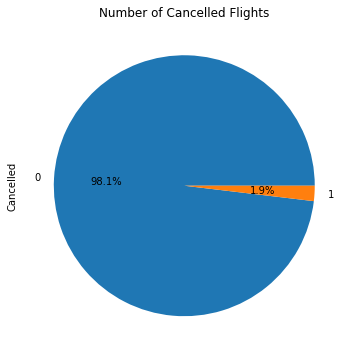

In [4]:
plt.title('Number of Cancelled Flights') #add the title
# plot the digram in pie type, write the persintage on the pie and change it the size
flights['Cancelled'].value_counts().plot(kind="pie",autopct='%1.1f%%', figsize=[10,6]);

## (Top 10 Destination Airports 2)

> The Top Airports that have many flights lands on it.

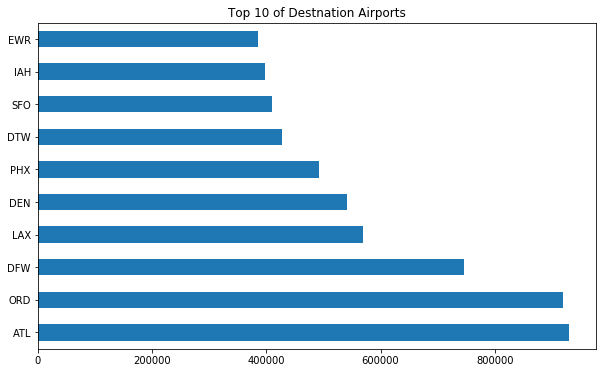

In [5]:
plt.title('Top 10 of Destnation Airports') #add the title
top_10_Dep.plot(kind="barh", figsize=[10,6]); # plot the digram in bar type and change it the size

## (Carriers and airport with with Cancelled flights"Origin" 3)

> PI Airline is the most Canceled Airlines in the Top 10 Origin flights

> A lot of flights in LAX is cancelled

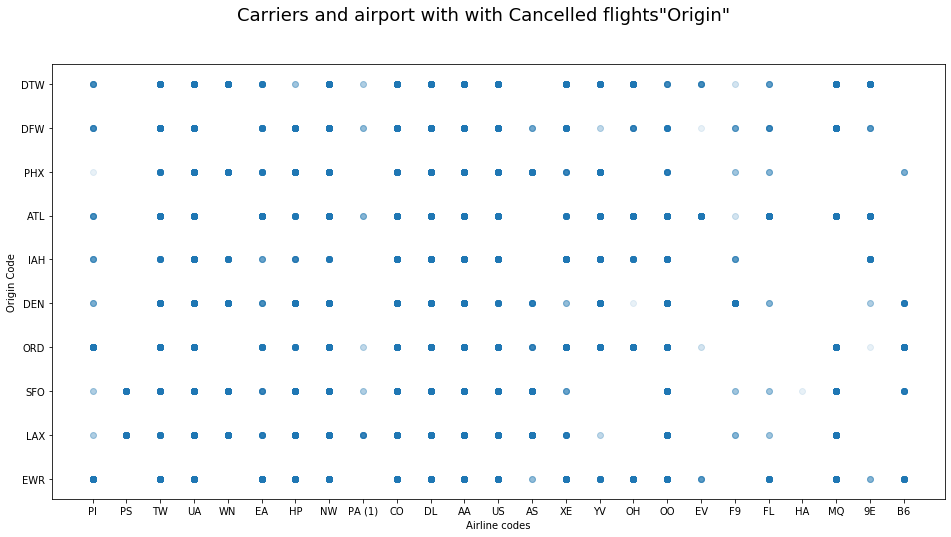

In [6]:
# Set the plot size
fig = plt.figure(figsize = [16,8])

# use the scatter
plt.scatter(data = Flights_Top_Arr_Can, x = 'UniqueCarrier', y='Origin', alpha = .1)

# write the title
fig.suptitle('Carriers and airport with with Cancelled flights"Origin"', fontsize=18)

# write x and y labels
plt.xlabel('Airline codes')
plt.ylabel('Origin Code');

## (The Status of the Top Origin Airports 4)

> ORD and ATl have the most Delay Airports.

> PHX is the less Airport with Delay

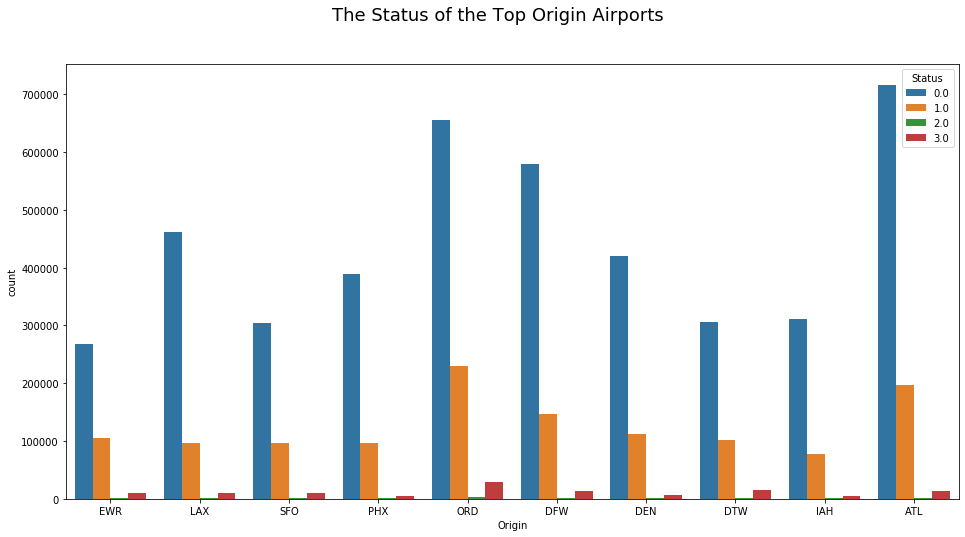

In [8]:
# Set the plot size
fig = plt.figure(figsize = [16,8])

# write the title
fig.suptitle('The Status of the Top Origin Airports', fontsize=18)

# use the bar plot
sb.countplot(data = Flights_Top_Arr, x = 'Origin', hue = 'Status');

## (The Delay for the Carrier in the top Airlines ( Origin ) 5)

> ORD Airlines is the most delayed airlaines specially in UA, NW and CO and the delay take more time SFO is best Airlines with less time in the delay.

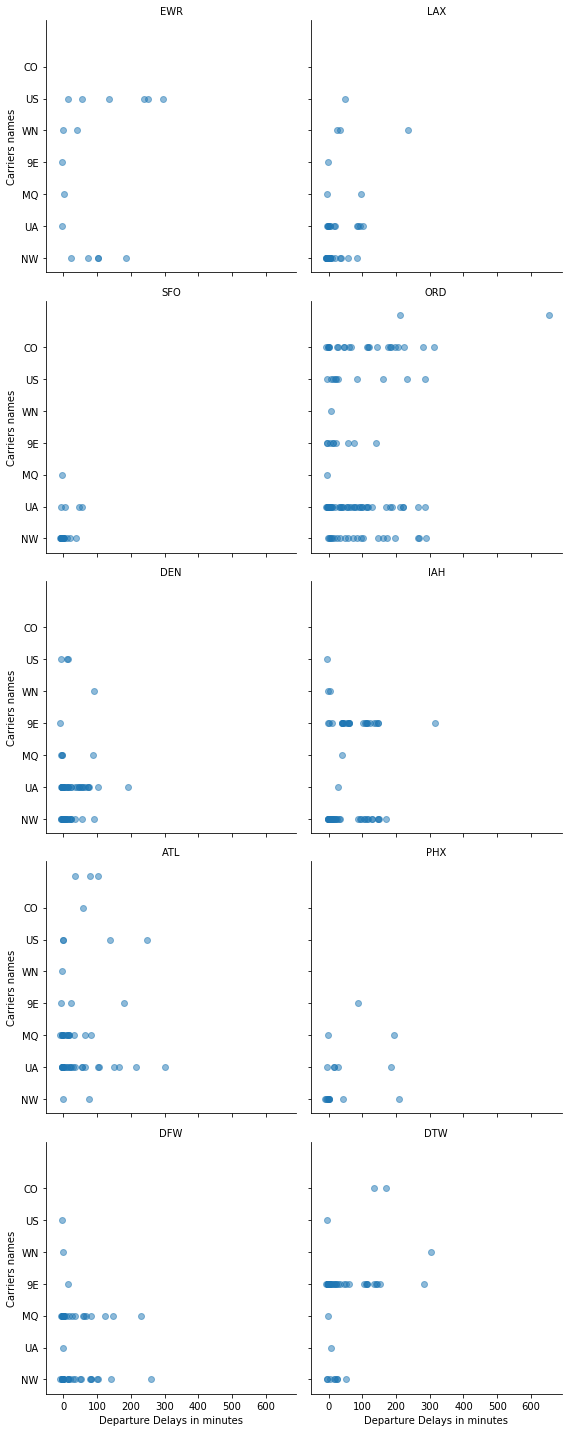

In [9]:
# I use faceting by Origin
Flight_Cancel_plot = sb.FacetGrid(Flights_Top_Arr_Can, col = 'Origin', col_wrap = 2,palette="Set1", size = 4)

# Each graph is a categorical for departure delays and carrier name
Flight_Cancel_plot.map(plt.scatter, 'DepDelay', 'UniqueCarrier', alpha = .5 )

# set the axis labels
Flight_Cancel_plot.set_axis_labels("Departure Delays in minutes", "Carriers names");

# set each facet title with the Origin name
Flight_Cancel_plot.set_titles("{col_name}");

## (The canellation code for the Carrier in the top Airlines ( Origin ) 6)


> DTW Airlines is the most cancelled airline and the reason is Weather

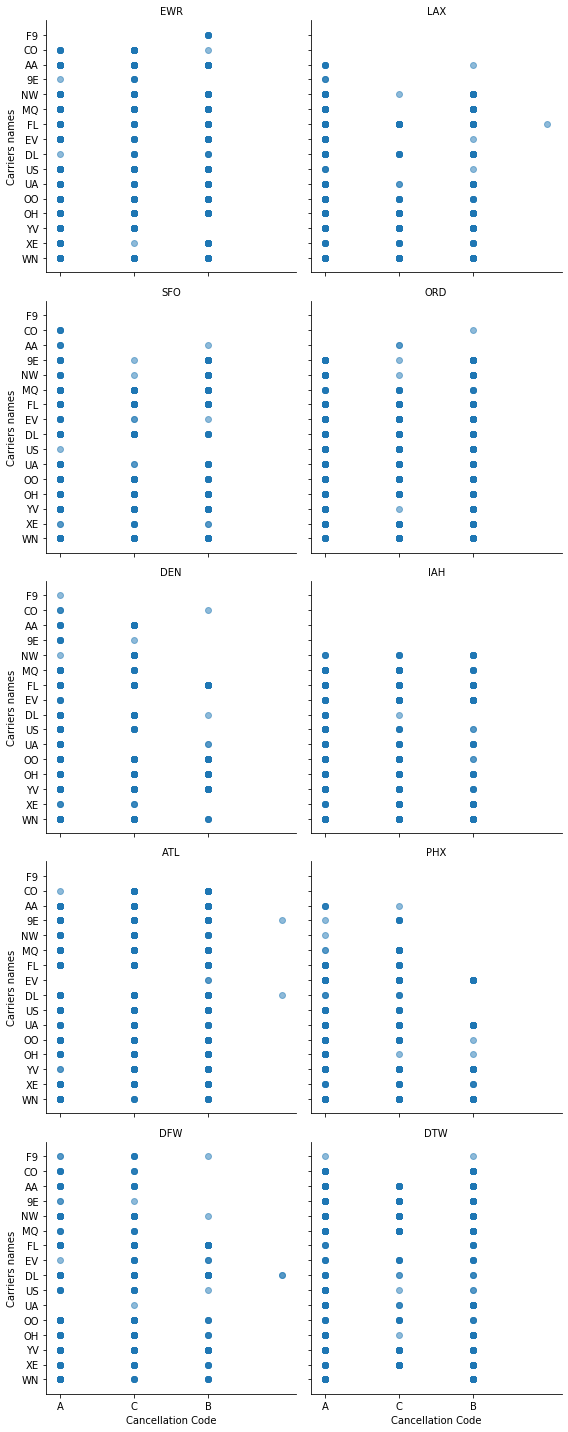

In [10]:
# I use faceting by Origin
Flight_Cancel_plot = sb.FacetGrid(Flights_Top_Arr_Can, col = 'Origin', col_wrap = 2,palette="Set1", size = 4)

# Each graph is a categorical for departure delays and carrier name
Flight_Cancel_plot.map(plt.scatter, 'CancellationCode', 'UniqueCarrier', alpha = .5 )

# set the axis labels
Flight_Cancel_plot.set_axis_labels("Cancellation Code", "Carriers names");

# set each facet title with the Origin name
Flight_Cancel_plot.set_titles("{col_name}");